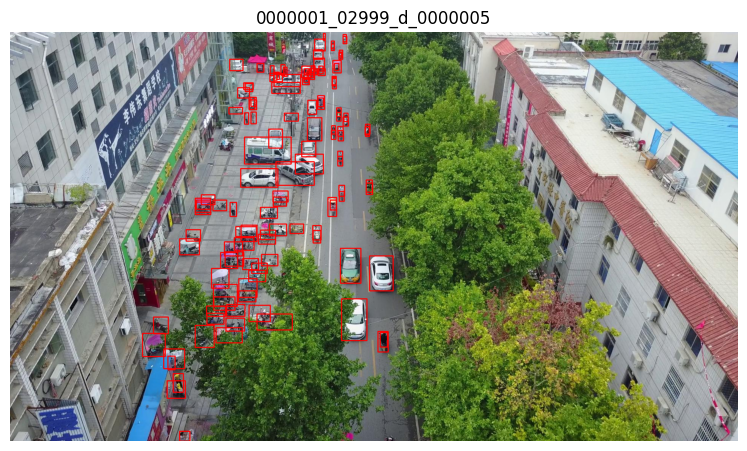

In [2]:
# plotting after yolo conversion
import matplotlib.pyplot as plt
import random
import cv2
import os
import glob

from PIL import Image, ImageDraw

# function to plot the bounding boxes to their respective images
def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
    
        x1, y1, x2, y2 = yolo2bbox(box, w, h)
        thickness = 2
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        cv2.rectangle(
            image,
            (x1, y1), (x2, y2),
            (0, 0, 255),
            thickness
        )
    return image


def yolo2bbox(bboxes, w, h):
    half_width = (bboxes[2] * w) / 2
    half_height = (bboxes[3] * h) / 2
    x_min = int((bboxes[0] * w) - half_width)
    y_min = int((bboxes[1] * h) - half_height)
    x_max = int((bboxes[0] * w) + half_width)
    y_max = int((bboxes[1] * h) + half_height)
    return [x_min, y_min, x_max, y_max]



def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    # print(all_images)
    
    # all_images.sort()data = line.strip().split(' ')

    num_images = len(all_images)
    # print(num_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_samples-1)
        # j = 1
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        bboxes = []
        labels = []
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            label_lines = f.readlines()
            for label_line in label_lines:
                data = label_line.strip().split(' ')
                image_class = data[0]
                bounding_box = [float(val) for val in data[1:]]
                # img = Image.open("datasets/VisDrone/VisDrone2019-DET-train/images/"+image_name + ".jpg")
                bboxes.append(bounding_box)
                labels.append(image_class)
                # x_c, y_c, w, h = image_size
                # x_c = float(x_c)
                # y_c = float(y_c)
                # w = float(w)
                # h = float(h)
                # bboxes.append([x_c, y_c, w, h])
                # labels.append(label)
        result_image = plot_box(image, bboxes , labels)
        
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.title(image_name)
        plt.axis('off')

    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()
    


plot(
    image_paths="F:\Harshit\Harshit_Testing\datasets_actual\VisDrone\VisDrone2019-DET-val\in_img", 
    label_paths="F:\Harshit\Harshit_Testing\datasets_actual\VisDrone\VisDrone2019-DET-val\in_label",
    num_samples=1,
)